# A Crash Course in Python

## What type of language is python?

[Python](python.org) is an interpreted high level dynamically typed garbage-collected language. This means, inlike java or C, you don't need to compile python code.  

* *Interpreted*: You interact with the language via a [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop).
* *High level*: Functions themselves are objects that can be passed around.
* *Dynamically typed*: variables don't have types, values do!
* *Garbage collected*: if you create an object, and you don't need it anymore, it is automatically erased.

## Simple values

* integers
* floating point numbers
* characters
* strings

In [ ]:
12

In [ ]:
12.0

In [ ]:
"Ceci n'est pas une pipe."

### Do not confuse the finger pointing at the moon with the moon.

> As the ignorant grasp the finger-tip and not the moon, so those who cling to the letter, know not my truth.
> *Lankavatara Sutra*

![Magritte: Ceci n'est pas une pipe](images/MagrittePipe.jpg)

Image: [*La Trahison des images* by Rene Magritte](https://en.wikipedia.org/wiki/The_Treachery_of_Images)

In [ ]:
a = "Ceci n'est pas une pipe"
a

Variables are temporal *pointers* that point to values kept in memory, and nothing else. The relationships between variables are static, say unlike excel.

In [ ]:
a = 12
b = a+1
a = 20
b

In [ ]:
a = 0
a = a + 1
a = a + 2
a

## Container types

* arrays
* lists
* sets
* maps (dictionaries in python parlance)

In [ ]:
[1,2,4,8,16]

In [ ]:
(1,2,4,8,16)

In [ ]:
{1,2,4,8,16}

In [ ]:
{'a': 1, 'b': 2, 'c': 4}

In [ ]:
a = {'a': 1, 'b': 2, 'c': 4}
a['a']

## Control structures

* `if` statements, `while` and `for` loops:

In [ ]:
a = 0

if a % 2 == 0:
    print("even")
else: 
    print("odd")

In [ ]:
a,b = 1,1
i = 0
res = [1,1]
while i < 10:
    i = i+1
    a,b = b,a+b
    res = res + [b]
res

In [ ]:
res = [1,1]
for i in range(10):
    res = res + [ res[i] + res[i+1] ]
res

## Comprehensions

Comprehensions is a useful idiom that makes a lot of things easy:

Say you have an array,

In [ ]:
a = [-1,0,2,-1,2,0,-2,3,4,0,0,2,3,4]

but you need to apply a specific function to it, say taking squares. In python we use comprehensions:

In [ ]:
[ x*x for x in a ]

In [ ]:
{ x*x for x in a if x > 0 }

## Functions

A function is an object that takes inputs and produces an output.



In [ ]:
def fibonacci(n):
    res = [1,1]
    for i in range(n-2):
        res = res + [ res[i] + res[i+1] ]
    return(res)

In [ ]:
fibonacci(120)

## What are we dealing with?

![Interaction graph](images/interaction.png)


## Libraries

In this class we are going to use the following libraries **a lot**:

* [`numpy`](http://www.numpy.org/)
* [`pandas`](https://pandas.pydata.org/)
* [`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html)
* [`scikit-learn`](http://scikit-learn.org/stable/)
* [`matplotlib`](https://matplotlib.org/)

We import libraries as follows:

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
a = np.matrix(np.random.rand(2,4))
b = np.matrix(np.random.rand(4,5))
c = a*b
c.shape

In [ ]:
plt.hist(stats.norm.rvs(size=1000))
plt.show()

## How can we get help on a library function?



In [ ]:
help(stats.norm)

# A simple example 

In the first example we are going to write, we are going to approximate $\pi$ using random numbers: the probability that a uniformly randomly chosen point in the square determined by $(0,0)$ and $(1,1)$ that lies in the quarter of a  disk $x^2+y^2\leq 1$ is $\frac{\pi}{4}$.



In [ ]:
count = 0
N = 1000
for i in range(N):
    x = np.random.rand()
    y = np.random.rand()
    if(x**2 + y**2 <= 1):
        count = count + 1
count*4/N

In [ ]:
count = 0
N = 1000
points = np.random.rand(N,2)
for i in range(N):
    if( points[i,0]**2 + points[i,1]**2 <= 1):
        count = count + 1
count*4/N

In [ ]:
def circle(x,y): return(x**2 + y**2 <= 1)

N = 1000
points = np.random.rand(N,2)
count = np.array([1 for i in range(N) if circle(points[i,0], points[i,1])]).sum()
count*4/N

In [ ]:
def area(N, fn):
    points = np.random.rand(N,2)
    count = np.array([1 for i in range(N) if fn(points[i,0], points[i,1])]).sum()
    return(count/N)

In [ ]:
4*area(2000,circle)

In [ ]:
def line(x,y): return(y<=x)

area(4000,line)

In [ ]:
area(5000, lambda x,y: y<=x)

In [ ]:
area(5000, lambda x,y: y<=x**2)

In [ ]:
area(5000, lambda x,y: x**2+y**2<=1)*4

# Another example (exchange rates)



In [7]:
from urllib.request import urlopen
from xmltodict import parse

In [8]:
conn = urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml")
raw = parse(conn.read().decode('utf8'))
conn.close()

In [23]:
raw['gesmes:Envelope']['Cube']['Cube']['Cube']

[OrderedDict([('@currency', 'USD'), ('@rate', '1.1707')]),
 OrderedDict([('@currency', 'JPY'), ('@rate', '132.15')]),
 OrderedDict([('@currency', 'BGN'), ('@rate', '1.9558')]),
 OrderedDict([('@currency', 'CZK'), ('@rate', '25.715')]),
 OrderedDict([('@currency', 'DKK'), ('@rate', '7.4591')]),
 OrderedDict([('@currency', 'GBP'), ('@rate', '0.88973')]),
 OrderedDict([('@currency', 'HUF'), ('@rate', '323.70')]),
 OrderedDict([('@currency', 'PLN'), ('@rate', '4.2779')]),
 OrderedDict([('@currency', 'RON'), ('@rate', '4.6701')]),
 OrderedDict([('@currency', 'SEK'), ('@rate', '10.3208')]),
 OrderedDict([('@currency', 'CHF'), ('@rate', '1.1371')]),
 OrderedDict([('@currency', 'ISK'), ('@rate', '128.70')]),
 OrderedDict([('@currency', 'NOK'), ('@rate', '9.5015')]),
 OrderedDict([('@currency', 'HRK'), ('@rate', '7.4318')]),
 OrderedDict([('@currency', 'RUB'), ('@rate', '76.9011')]),
 OrderedDict([('@currency', 'TRY'), ('@rate', '7.0415')]),
 OrderedDict([('@currency', 'AUD'), ('@rate', '1.6200

In [30]:
rates = {x['@currency']: float(x['@rate']) for x in raw['gesmes:Envelope']['Cube']['Cube']['Cube']}
rates

{'AUD': 1.62,
 'BGN': 1.9558,
 'BRL': 4.729,
 'CAD': 1.5301,
 'CHF': 1.1371,
 'CNY': 8.055,
 'CZK': 25.715,
 'DKK': 7.4591,
 'GBP': 0.88973,
 'HKD': 9.1478,
 'HRK': 7.4318,
 'HUF': 323.7,
 'IDR': 17450.33,
 'ILS': 4.2188,
 'INR': 84.983,
 'ISK': 128.7,
 'JPY': 132.15,
 'KRW': 1301.82,
 'MXN': 22.0889,
 'MYR': 4.8398,
 'NOK': 9.5015,
 'NZD': 1.7638,
 'PHP': 63.357,
 'PLN': 4.2779,
 'RON': 4.6701,
 'RUB': 76.9011,
 'SEK': 10.3208,
 'SGD': 1.5976,
 'THB': 37.96,
 'TRY': 7.0415,
 'USD': 1.1707,
 'ZAR': 16.5152}

In [31]:
rates['TRY']

7.0415

In [32]:
def getExchangeRates():
    conn = urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml")
    raw = parse(conn.read().decode('utf8'))
    conn.close()
    rates = {x['@currency']: float(x['@rate']) for x in raw['gesmes:Envelope']['Cube']['Cube']['Cube']}
    return(rates)

In [34]:
rates = getExchangeRates()
rates['USD']

1.1707

In [37]:
def QueryECB(Cfrom, Cto):
    raw1 = urlopen("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D." + Cfrom + "." + Cto + ".SP00.A")
    raw2 = raw1.read().decode('utf8')
    raw1.close()
    raw3 = parse(raw2)
    raw4 = raw3['message:GenericData']['message:DataSet']['generic:Series']['generic:Obs']
    res = {x['generic:ObsDimension']['@value']: 
           float(x['generic:ObsValue']['@value'])
           for x in raw4}
    return res

CADEUR = QueryECB('CAD','EUR')
CADEUR

{'1999-01-04': 1.8004,
 '1999-01-05': 1.7965,
 '1999-01-06': 1.7711,
 '1999-01-07': 1.7602,
 '1999-01-08': 1.7643,
 '1999-01-11': 1.7463,
 '1999-01-12': 1.7392,
 '1999-01-13': 1.8123,
 '1999-01-14': 1.7707,
 '1999-01-15': 1.7797,
 '1999-01-18': 1.7717,
 '1999-01-19': 1.7739,
 '1999-01-20': 1.7626,
 '1999-01-21': 1.7529,
 '1999-01-22': 1.7515,
 '1999-01-25': 1.762,
 '1999-01-26': 1.7609,
 '1999-01-27': 1.7526,
 '1999-01-28': 1.7374,
 '1999-01-29': 1.726,
 '1999-02-01': 1.7123,
 '1999-02-02': 1.7079,
 '1999-02-03': 1.7151,
 '1999-02-04': 1.6951,
 '1999-02-05': 1.6765,
 '1999-02-08': 1.6725,
 '1999-02-09': 1.6944,
 '1999-02-10': 1.6945,
 '1999-02-11': 1.685,
 '1999-02-12': 1.6752,
 '1999-02-15': 1.6781,
 '1999-02-16': 1.6807,
 '1999-02-17': 1.688,
 '1999-02-18': 1.676,
 '1999-02-19': 1.6616,
 '1999-02-22': 1.6351,
 '1999-02-23': 1.6423,
 '1999-02-24': 1.6582,
 '1999-02-25': 1.6543,
 '1999-02-26': 1.6684,
 '1999-03-01': 1.6579,
 '1999-03-02': 1.6605,
 '1999-03-03': 1.6615,
 '1999-03-04': 1

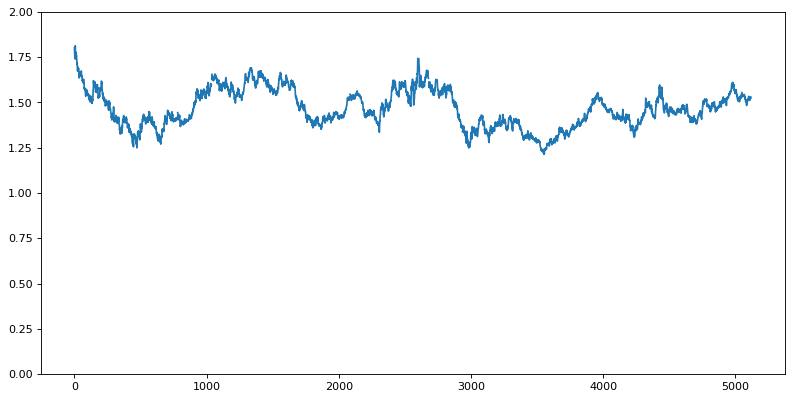

In [44]:
dates = CADEUR.keys()
xs = list(range(len(dates)))
ys = [CADEUR[x] for x in sorted(dates)]

plt.figure(figsize=(12, 6), dpi=80)
plt.ylim(0.0, 2.0)

plt.plot(xs,ys)
plt.show()